In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import os

import lightgbm as lgbm

from LGBMSelGB import LGBMSelGB
from utils import compare_model_error, load_data

In [11]:
os.listdir(datasets_dir)

['istella-letor', 'istella-s-letor', 'istella-short']

In [28]:
base_dir = os.path.dirname(os.getcwd())
datasets_dir = os.path.join(base_dir, 'datasets')
if 'istella-short' in os.listdir(datasets_dir):
    tmp = os.path.join(datasets_dir, 'istella-short\sample')
    train_file = os.path.join(tmp, "train.txt")
    valid_file = os.path.join(tmp, "vali.txt")
    test_file = os.path.join(tmp, "test.txt")
else:
    tmp = os.path.join(datasets_dir, 'istella-s-letor\sample')
    train_file = os.path.join(tmp, "train.txt")
    valid_file = os.path.join(tmp, "vali.txt")
    test_file = os.path.join(tmp, "test.txt")
output_dir = os.path.join(base_dir, 'output')
models_dir = os.path.join(output_dir, 'models')
results_dir = os.path.join(output_dir, 'results')

In [17]:
train_data, train_labels, train_query_lens = load_data(train_file)
print('Training set loaded')

Training set loaded


In [18]:
valid_data, valid_labels, valid_query_lens = load_data(valid_file)
print('Validation set loaded')

Validation set loaded


In [19]:
test_data, test_labels, test_query_lens = load_data(test_file)
print('Testing set loaded')

Testing set loaded


In [20]:
train_set = lgbm.Dataset(train_data, label=train_labels, group=train_query_lens).construct()
eval_set = [(train_data, train_labels),
            (valid_data, valid_labels),
            (test_data, test_labels)]
eval_group = [train_query_lens, valid_query_lens, test_query_lens]
eval_names = ['train', 'valid', 'test']
valid_sets = []
for i, eval_data in enumerate(eval_set):
    ds = lgbm.Dataset(eval_data[0], eval_data[1], group=eval_group[i], reference=train_set).construct()
    valid_sets.append(ds)

In [22]:
params = {
    'objective': 'lambdarank',
    'max_position': 10,
    'learning_rate': 0.05,
    'num_leaves': 64,
    'metric': ['ndcg'],
    'ndcg_eval_at': 10,
    'verbosity': 1,
}
lgbm_base_info = {}
lgbm_base = lgbm.train(params, train_set, num_boost_round=200,
                       valid_sets=valid_sets, valid_names=eval_names,
                       verbose_eval=10, evals_result=lgbm_base_info)

[10]	train's ndcg@10: 0.751803	valid's ndcg@10: 0.70728	test's ndcg@10: 0.658662
[20]	train's ndcg@10: 0.769281	valid's ndcg@10: 0.716635	test's ndcg@10: 0.674742
[30]	train's ndcg@10: 0.780111	valid's ndcg@10: 0.7245	test's ndcg@10: 0.683186
[40]	train's ndcg@10: 0.791289	valid's ndcg@10: 0.729076	test's ndcg@10: 0.688299
[50]	train's ndcg@10: 0.80022	valid's ndcg@10: 0.73508	test's ndcg@10: 0.690998
[60]	train's ndcg@10: 0.808753	valid's ndcg@10: 0.740799	test's ndcg@10: 0.693883
[70]	train's ndcg@10: 0.815234	valid's ndcg@10: 0.741975	test's ndcg@10: 0.698416
[80]	train's ndcg@10: 0.82143	valid's ndcg@10: 0.746064	test's ndcg@10: 0.703161
[90]	train's ndcg@10: 0.827394	valid's ndcg@10: 0.747312	test's ndcg@10: 0.705186
[100]	train's ndcg@10: 0.833143	valid's ndcg@10: 0.748807	test's ndcg@10: 0.707051
[110]	train's ndcg@10: 0.838217	valid's ndcg@10: 0.749204	test's ndcg@10: 0.709617
[120]	train's ndcg@10: 0.843068	valid's ndcg@10: 0.750001	test's ndcg@10: 0.709953
[130]	train's ndcg@

In [23]:
params['boosting'] = 'goss'
lgbm_goss_info = {}
lgbm_goss = lgbm.train(params, train_set, num_boost_round=200,
                      valid_sets=valid_sets, valid_names=eval_names,
                      verbose_eval=10, evals_result=lgbm_goss_info)
del params['boosting']

[10]	train's ndcg@10: 0.751803	valid's ndcg@10: 0.70728	test's ndcg@10: 0.658662
[20]	train's ndcg@10: 0.769281	valid's ndcg@10: 0.716635	test's ndcg@10: 0.674742
[30]	train's ndcg@10: 0.781878	valid's ndcg@10: 0.724098	test's ndcg@10: 0.684046
[40]	train's ndcg@10: 0.791767	valid's ndcg@10: 0.728227	test's ndcg@10: 0.69014
[50]	train's ndcg@10: 0.800793	valid's ndcg@10: 0.732447	test's ndcg@10: 0.695384
[60]	train's ndcg@10: 0.808428	valid's ndcg@10: 0.73908	test's ndcg@10: 0.700357
[70]	train's ndcg@10: 0.815409	valid's ndcg@10: 0.74165	test's ndcg@10: 0.703361
[80]	train's ndcg@10: 0.822013	valid's ndcg@10: 0.744042	test's ndcg@10: 0.706525
[90]	train's ndcg@10: 0.827325	valid's ndcg@10: 0.746008	test's ndcg@10: 0.707322
[100]	train's ndcg@10: 0.833864	valid's ndcg@10: 0.747484	test's ndcg@10: 0.709886
[110]	train's ndcg@10: 0.839144	valid's ndcg@10: 0.749214	test's ndcg@10: 0.712136
[120]	train's ndcg@10: 0.844168	valid's ndcg@10: 0.75216	test's ndcg@10: 0.711635
[130]	train's ndcg

In [24]:
selgb_base = LGBMSelGB(n_estimators=200, n_iter_sample=10, p=0.1, method='fixed')
selgb_base.fit(train_data, train_labels, train_query_lens, params,
           eval_set=eval_set, eval_group=eval_group, eval_names=eval_names,
           verbose=10)

[10]	train's ndcg@10: 0.751803	valid's ndcg@10: 0.70728	test's ndcg@10: 0.658662
[SelGB] [Info] new p: 0.1
SelGB sample execution took 0.05 min
[20]	train's ndcg@10: 0.789062	valid's ndcg@10: 0.722787	test's ndcg@10: 0.672309
[SelGB] [Info] new p: 0.1
SelGB sample execution took 0.07 min
[30]	train's ndcg@10: 0.805319	valid's ndcg@10: 0.733138	test's ndcg@10: 0.68288
[SelGB] [Info] new p: 0.1
SelGB sample execution took 0.05 min
[40]	train's ndcg@10: 0.817844	valid's ndcg@10: 0.737809	test's ndcg@10: 0.689097
[SelGB] [Info] new p: 0.1
SelGB sample execution took 0.05 min
[50]	train's ndcg@10: 0.827046	valid's ndcg@10: 0.742363	test's ndcg@10: 0.693616
[SelGB] [Info] new p: 0.1
SelGB sample execution took 0.05 min
[60]	train's ndcg@10: 0.834589	valid's ndcg@10: 0.745205	test's ndcg@10: 0.696883
[SelGB] [Info] new p: 0.1
SelGB sample execution took 0.06 min
[70]	train's ndcg@10: 0.84184	valid's ndcg@10: 0.748528	test's ndcg@10: 0.698247
[SelGB] [Info] new p: 0.1
SelGB sample execution to

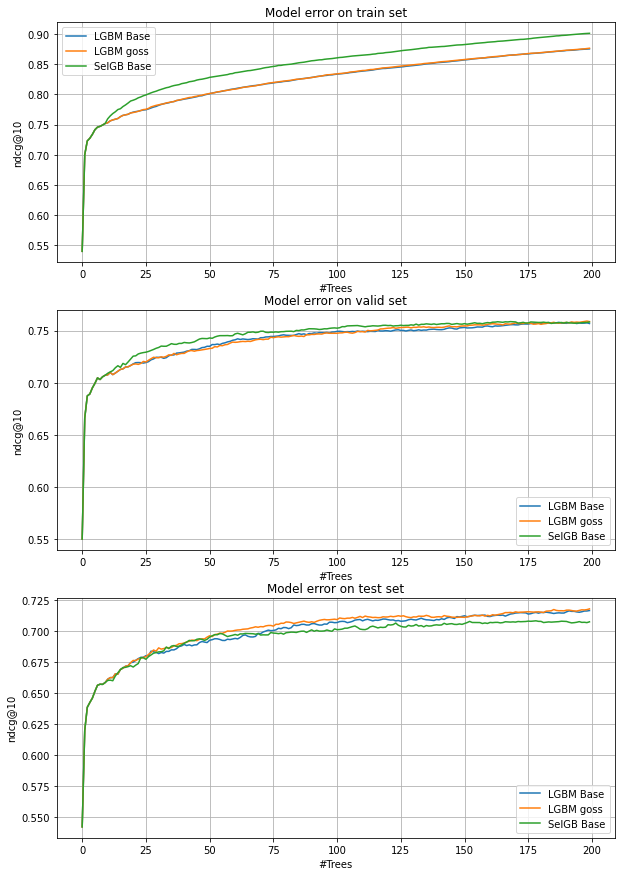

In [26]:
ndcg_150, ndcg_full = compare_model_error([lgbm_base_info, lgbm_goss_info, selgb_base.get_eval_result()],
                                          ['LGBM Base', 'LGBM goss', 'SelGB Base'], plot=True)

In [31]:
lgbm_base.save_model(os.path.join(models_dir, 'lgbm_base.txt'))
lgbm_goss.save_model(os.path.join(models_dir, 'lgbm_goss.txt'))
selgb_base.save_model(os.path.join(models_dir, 'selgb_base.txt'))

In [32]:
ndcg_150.to_csv(os.path.join(results_dir, 'ndcg_150.csv'))
ndcg_150

,train,valid,test
LGBM Base,0.857172,0.753119,0.712614
LGBM goss,0.857907,0.754606,0.711377
SelGB Base,0.882627,0.756795,0.706375


In [33]:
ndcg_full.to_csv(os.path.join(results_dir, 'ndcg_full.csv'))
ndcg_full

,train,valid,test
LGBM Base,0.875441,0.756877,0.716858
LGBM goss,0.876581,0.758746,0.718208
SelGB Base,0.901315,0.758332,0.707759
